Data preprocessing and feature engineering are vital in data mining as they enhance the quality and performance of data mining models. Data preprocessing ensures that raw data is clean, consistent, and ready for analysis, while feature engineering improves the model’s ability to capture patterns and make accurate predictions.



To carry out this activity, follow the instructions below:

1. Review the company **business case** . Review the **problem statement** and download the required datasets.
    
    [here](https://sites.google.com/mmdc.mcl.edu.ph/finmarkcorp/data-mining)
    
2. Load the datasets to Jupyter Notebook and **perform the necessary data processing using Python.**
3. Once done, **engineer new features to help the model arrive at better solutions to the outline problem statement.**
4. Save your output and prepare for a discussion with your team.

# Step 1: Importing Libraries and Loading Data

In [7]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from google.colab import drive
drive.mount('/content/drive')


# loading datasets
customer_feedback_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finmark_data_mining/Customer_Feedback_Data.csv")
product_offering_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finmark_data_mining/Product_Offering_Data.csv")
transaction_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finmark_data_mining/Transaction_Data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Display First Few Rows


In [ ]:
print(customer_feedback_df.head())

   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7


In [ ]:
print(product_offering_df.head())

   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group Target_Income_Group  
0               NaN              Medium  
1               NaN                 Low  
2               NaN                High  
3               NaN                High  
4               NaN              Medium  


In [ ]:
print(transaction_df.head())

   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00                 NaN   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  


**Check data size with df.shape**


In [ ]:
print(customer_feedback_df.shape)

(5050, 4)


In [ ]:
print(product_offering_df.shape)

(15, 6)


In [ ]:
print(transaction_df.shape)

(5050, 5)


**Examine column names with df.columns**

In [ ]:
print(customer_feedback_df.columns)

Index(['Customer_ID', 'Satisfaction_Score', 'Feedback_Comments',
       'Likelihood_to_Recommend'],
      dtype='object')


In [ ]:
print(product_offering_df.columns)

Index(['Product_ID', 'Product_Name', 'Product_Type', 'Risk_Level',
       'Target_Age_Group', 'Target_Income_Group'],
      dtype='object')


In [ ]:
print(transaction_df.columns)

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date',
       'Transaction_Amount', 'Transaction_Type'],
      dtype='object')


**Display data types with df.dtypes**

In [ ]:
print(customer_feedback_df.dtypes)

Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object


In [ ]:
print(product_offering_df.dtypes)

Product_ID               int64
Product_Name            object
Product_Type            object
Risk_Level              object
Target_Age_Group       float64
Target_Income_Group     object
dtype: object


In [ ]:
print(transaction_df.dtypes)

Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object


# Step 2: Initial Data Exploration

Detailed Overview of Datasets

In [ ]:
# Check Basic Info
customer_feedback_df.info()
product_offering_df.info()
transaction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 157.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtyp

In [ ]:
# Summary statistics
print(customer_feedback_df.describe())
print(product_offering_df.describe())
print(transaction_df.describe())


       Customer_ID  Satisfaction_Score  Likelihood_to_Recommend
count  5050.000000         4949.000000              5050.000000
mean    501.949703            5.684785                 5.571287
std     288.806331            3.606511                 2.872577
min       1.000000            1.000000                 1.000000
25%     253.000000            3.000000                 3.000000
50%     502.000000            6.000000                 6.000000
75%     751.750000            8.000000                 8.000000
max    1000.000000           60.000000                10.000000
       Product_ID  Target_Age_Group
count   15.000000               0.0
mean     5.133333               NaN
std      3.159265               NaN
min      1.000000               NaN
25%      2.500000               NaN
50%      5.000000               NaN
75%      7.500000               NaN
max     10.000000               NaN
       Transaction_ID  Customer_ID  Transaction_Amount
count     5050.000000  5050.000000         49

In [ ]:
#  Check for unique values
print(customer_feedback_df.nunique())
print(product_offering_df.nunique())
print(transaction_df.nunique())

Customer_ID                1000
Satisfaction_Score           17
Feedback_Comments             5
Likelihood_to_Recommend      10
dtype: int64
Product_ID             10
Product_Name           10
Product_Type            4
Risk_Level              3
Target_Age_Group        0
Target_Income_Group     3
dtype: int64
Transaction_ID        5000
Customer_ID            993
Transaction_Date      5000
Transaction_Amount    3183
Transaction_Type         4
dtype: int64


# Step 3: Handling Duplicates and Outliers

**Handling Duplicates**

In [ ]:
# Check for duplicates
print("Duplicates in feedback:", customer_feedback_df.duplicated().sum())
print("Duplicates in products:", product_offering_df.duplicated().sum())
print("Duplicates in transactions:", transaction_df.duplicated().sum())


Duplicates in feedback: 81
Duplicates in products: 5
Duplicates in transactions: 50


Handling Duplicate Rows in customer_feedback_df


In [ ]:
print(customer_feedback_df[customer_feedback_df.duplicated()])
print(customer_feedback_df.duplicated(subset=['Customer_ID']).sum())


      Customer_ID  Satisfaction_Score Feedback_Comments  \
1127          972                 3.0      Good service   
1541          380                 2.0    Unsatisfactory   
1619          309                 6.0    Unsatisfactory   
1796          726                 3.0    Very satisfied   
1950          890                 3.0    Unsatisfactory   
...           ...                 ...               ...   
5045          757                 9.0      Good service   
5046          969                 2.0    Unsatisfactory   
5047          248                 4.0      Good service   
5048           58                 4.0    Unsatisfactory   
5049          635                 4.0    Very satisfied   

      Likelihood_to_Recommend  
1127                        1  
1541                        9  
1619                        1  
1796                        7  
1950                        5  
...                       ...  
5045                        3  
5046                        2  
504

In [ ]:
customer_feedback_df.drop_duplicates(subset=['Customer_ID'], keep='first', inplace=True)
print("Remaining duplicate rows:", customer_feedback_df.duplicated().sum())


Remaining duplicate rows: 0


Handling Duplicate Rows in product_offering_df

In [ ]:
print(product_offering_df[product_offering_df.duplicated()])
print(product_offering_df.duplicated(subset=['Product_ID']).sum())

    Product_ID                   Product_Name     Product_Type Risk_Level  \
10           2           Gold Savings Account  Savings Account        Low   
11          10             Travel Credit Card      Credit Card     Medium   
12           3  High-Yield Investment Account       Investment       High   
13           6                  Personal Loan             Loan     Medium   
14           1           Platinum Credit Card      Credit Card     Medium   

    Target_Age_Group Target_Income_Group  
10               NaN                 Low  
11               NaN              Medium  
12               NaN                High  
13               NaN                 Low  
14               NaN              Medium  
5


In [ ]:
product_offering_df.sort_values(by=['Product_ID'], ascending=True, inplace=True)
product_offering_df.drop_duplicates(
    subset=['Product_ID', 'Product_Name', 'Product_Type', 'Risk_Level', 'Target_Age_Group'],
    keep='first',
    inplace=True
)


In [ ]:
print("Remaining duplicate rows:", product_offering_df.duplicated().sum())

Remaining duplicate rows: 0


Handling Duplicate Rows in transaction_df

In [ ]:
print(transaction_df[transaction_df.duplicated()])
print(transaction_df.duplicated(subset=['Transaction_ID']).sum())

      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
5000            4065           89  2023-06-19 08:00:00              1218.0   
5001            4971          463  2023-07-27 02:00:00              3123.0   
5002            2591          387  2023-04-18 22:00:00              1239.0   
5003            2864           43  2023-04-30 07:00:00               857.0   
5004             156          474  2023-01-07 11:00:00              1164.0   
5005            3023          771  2023-05-06 22:00:00              3614.0   
5006            2617          356  2023-04-20 00:00:00              3896.0   
5007            2171          189  2023-04-01 10:00:00              3041.0   
5008            4558          992  2023-07-09 21:00:00               532.0   
5009            3327          750  2023-05-19 14:00:00              1648.0   
5010             198          592  2023-01-09 05:00:00               651.0   
5011             821           99  2023-02-04 04:00:00          

In [2]:
transaction_df.drop_duplicates(subset=['Transaction_ID'], keep='first', inplace=True)


In [3]:
print("Remaining duplicate rows:", transaction_df.duplicated().sum())

Remaining duplicate rows: 0


**Handling Outliers**


In [6]:
# Store datasets in a Dictionary
datasets = {
    'Feedback': customer_feedback_df,
    'Product_Offering': product_offering_df,
    'Transaction': transaction_df
}

In [9]:
def count_outliers_iqr(df):
    outlier_summary = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_summary[col] = num_outliers
    return outlier_summary

for dataset_name, df in datasets.items():
    outlier_counts = count_outliers_iqr(df)
    print(f"\nOutliers in {dataset_name} dataset:")
    for col, count in outlier_counts.items():
        print(f"  Column '{col}': {count} outliers")


Outliers in Feedback dataset:
  Column 'Customer_ID': 0 outliers
  Column 'Satisfaction_Score': 10 outliers
  Column 'Likelihood_to_Recommend': 0 outliers

Outliers in Product_Offering dataset:
  Column 'Product_ID': 0 outliers
  Column 'Target_Age_Group': 0 outliers

Outliers in Transaction dataset:
  Column 'Transaction_ID': 0 outliers
  Column 'Customer_ID': 0 outliers
  Column 'Transaction_Amount': 10 outliers


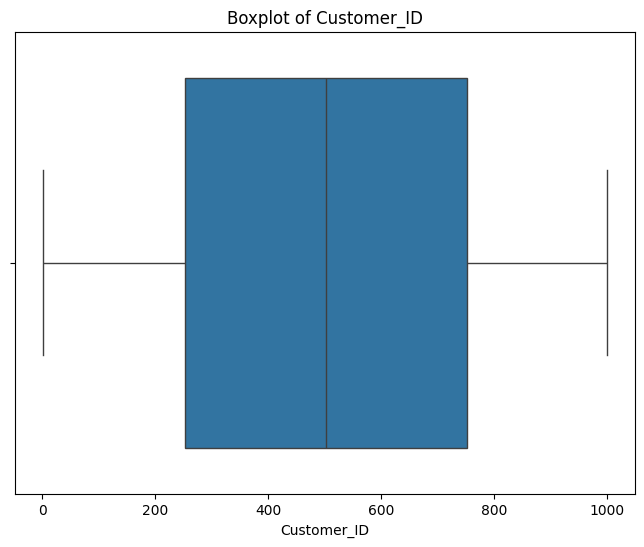

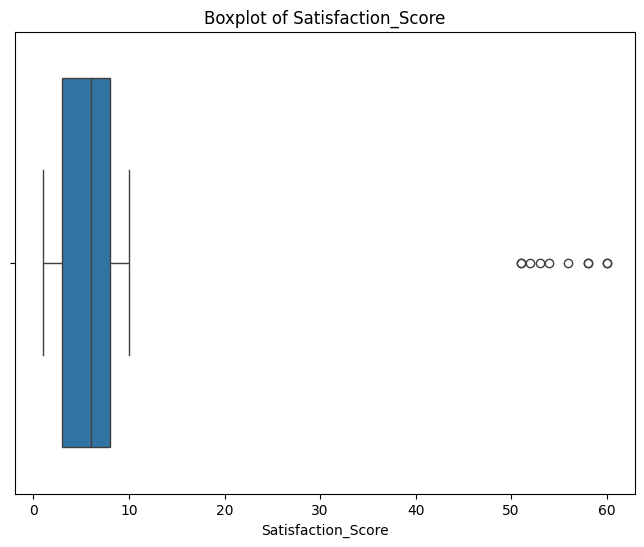

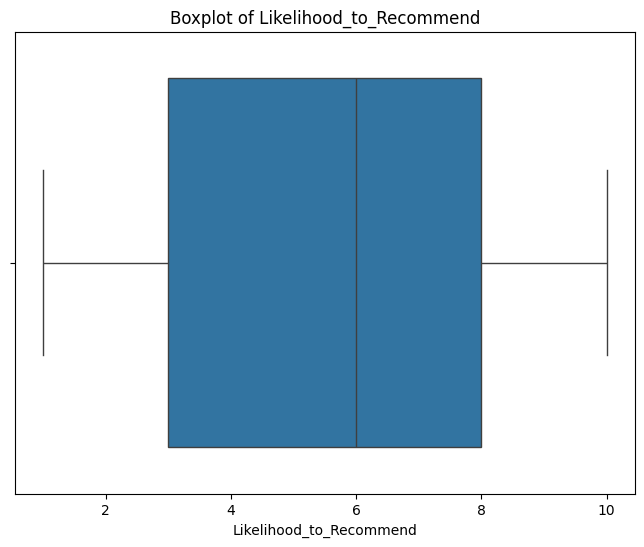

In [14]:
# Boxplot for numerical columns
for col in customer_feedback_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=customer_feedback_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [10]:
# Remove only outliers greater than 10
customer_feedback_df_cleaned = customer_feedback_df[customer_feedback_df['Satisfaction_Score'] <= 10]


In [11]:
print("Remaining scores above 10:", (customer_feedback_df_cleaned['Satisfaction_Score'] > 10).sum())


Remaining scores above 10: 0


In [16]:
# Save the cleaned data
customer_feedback_df_cleaned.to_csv('cleaned_customer_feedback.csv', index=False)
customer_feedback_df = customer_feedback_df_cleaned



#Step 4: Handling Missing Values

In [17]:
# Count missing values
print(customer_feedback_df.isnull().sum())
print(product_offering_df.isnull().sum())
print(transaction_df.isnull().sum())

Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       15
Target_Income_Group     0
dtype: int64
Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


Handling Missing Values from product_offering dataset.

In [18]:
# Drop the 'Target_Age_Group' column from the product_offering_df
product_offering_df.drop(columns=['Target_Age_Group'], inplace=True)

# Verify if the column is removed
print(product_offering_df.columns)


Index(['Product_ID', 'Product_Name', 'Product_Type', 'Risk_Level',
       'Target_Income_Group'],
      dtype='object')


In [ ]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(transaction_df['Transaction_Amount'].dropna(), bins=30, edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Handling Missing Values from product_offering dataset.

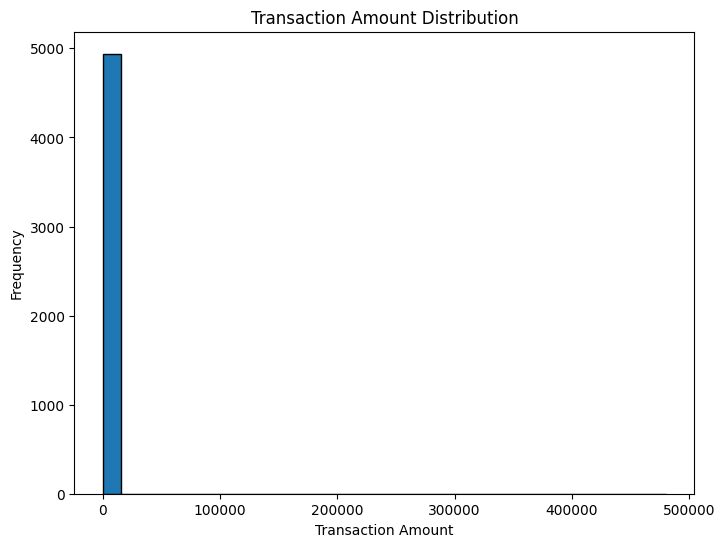

In [19]:
import matplotlib.pyplot as plt
#Visual Inspection
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(transaction_df['Transaction_Amount'].dropna(), bins=30, edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


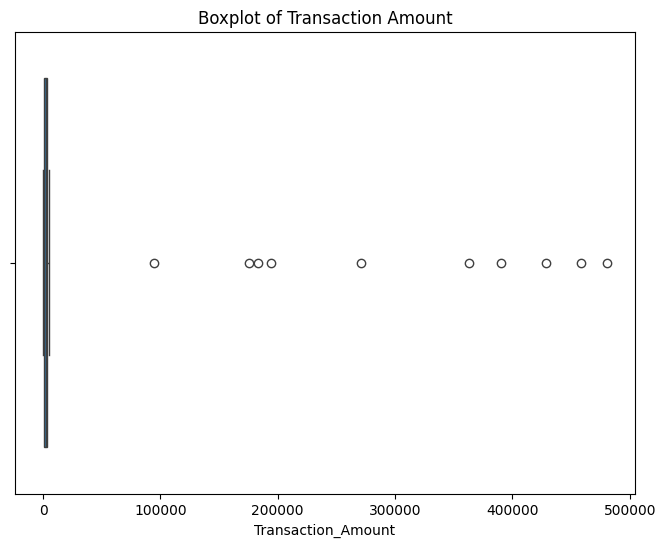

In [20]:
import seaborn as sns

# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=transaction_df['Transaction_Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [21]:
# Count missing values in 'Transaction_Amount' by transaction type
print(transaction_df.groupby('Transaction_Type')['Transaction_Amount'].apply(lambda x: x.isnull().sum()))


Transaction_Type
Bill Payment    32
Investment      20
Loan Payment    25
Purchase        23
Name: Transaction_Amount, dtype: int64


The data has outliers, so the median is a better choice to fill the missing values as it's less sensitive to extreme values.

In [23]:
# Fill missing values with the median transaction amount for each type
transaction_df['Transaction_Amount'] = transaction_df.groupby('Transaction_Type')['Transaction_Amount'].transform(lambda x: x.fillna(x.median()))

In [24]:
print(transaction_df['Transaction_Amount'].isnull().sum())  # Should print 0 if successful

0


#Step 5: Data Type Conversion